# Mana Forecasting Challenge: Rise of the Analysts

## Challenge Script:

In a world where mana is the lifeblood of cities, powering everything from skyships to protective barriers against dungeon outbreaks, forecasting mana demand is no longer a luxury—it's a necessity. The Mana Regulation Bureau (MRB) has summoned elite data sorcerers, code-warriors, and machine learning hunters to step forth and wield their power against the unpredictability of mana surges.

As a lone hunter—much like Sung Jin-Woo—you've been given access to mysterious scrolls: datasets filled with arcane metrics and hidden mana traces. Your mission? Predict future mana_demand from a chaotic system where the only constant is change.
Using your modeling skill as your weapon, you'll tame volatility, extract truth from temporal shadows, and reveal what lies beyond the data gate. The fate of mana infrastructure rests on your predictions


The dungeon doors are open, hunter.
Will you rise… and level up?
Your model will be judged using the Mean Squared Error (MSE)

### Challenge Hints: 
Requirement File: ...

# Régression linéaire

## I- Packages

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


## II- Comprendre les données

In [31]:
# Charger les données
train_data = pd.read_csv("Data/forcast_train_data.csv")
test_data = pd.read_csv("Data/forcast_test_data.csv")

# Afficher les premières lignes et les infos
print("Données d'entraînement :")
print(train_data.head())

print("\nDonnées de test :")
print(test_data.head())

# Liste les colonnes pour confirmer la présence de "mana_demand" dans train et son absence dans test.
print("\nColonnes d'entraînement :", train_data.columns.tolist())
print("Colonnes de test :", test_data.columns.tolist())

Données d'entraînement :
              datetime    city  mana_demand  weather_mana_flux  \
0  2024-01-01 00:00:00  City_1   806.235313          -1.381215   
1  2024-01-01 00:00:00  City_5   708.916660          -0.697669   
2  2024-01-01 00:00:00  City_7  1058.017265          -0.580591   
3  2024-01-01 00:00:00  City_4   992.977141           1.357038   
4  2024-01-01 00:00:00  City_8  1379.461791           0.668743   

   number_of_open_gates  raid_alert_level  hunter_teams_dispatched  \
0                   0.0          7.155268                      1.0   
1                   0.0          6.819325                      1.0   
2                   2.0          4.953610                      1.0   
3                   1.0          4.205503                      1.0   
4                   3.0               NaN                      0.0   

   mana_stabilizers_active  local_festival  mana_import_from_neighbors  ...  \
0                      1.0             0.0                  187.568955  ...   

## III- Préparer les données

In [32]:

# Remplacer les valeurs manquantes par 0 
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

# Encoder la colonne "city" (one-hot encoding)
train_data = pd.get_dummies(train_data, columns=["city"])
test_data = pd.get_dummies(test_data, columns=["city"])

# Aligner les colonnes (assurer que train et test ont les mêmes colonnes)
train_data, test_data = train_data.align(test_data, join='left', axis=1, fill_value=0)

# Séparer features et cible
X_train = train_data.drop("mana_demand", axis=1)
y_train = train_data["mana_demand"]
X_test = test_data

# Supprimer les colonnes non numériques (comme datetime) avant normalisation 
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test[X_train_numeric.columns]  # pour garder le même ordre

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Sauvegarder les données préparées (optionnel)
pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns).to_csv("Data/X_train_processed.csv", index=False)
pd.DataFrame(X_test_scaled, columns=X_test_numeric.columns).to_csv("Data/X_test_processed.csv", index=False)


## IV- Visualisation des données

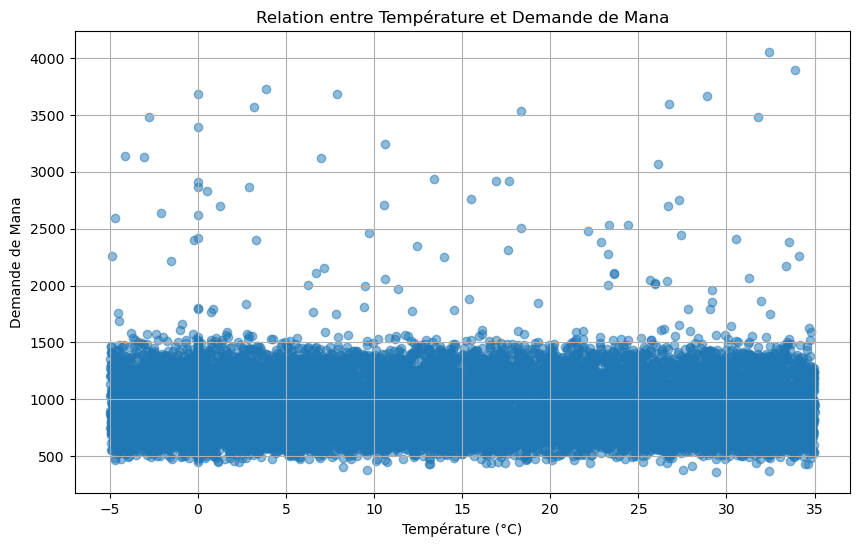

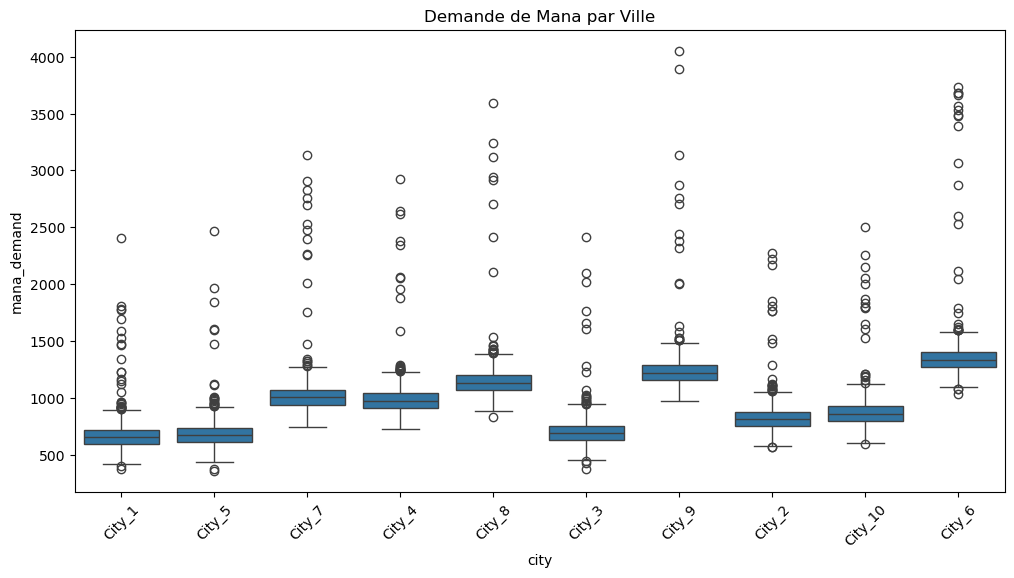

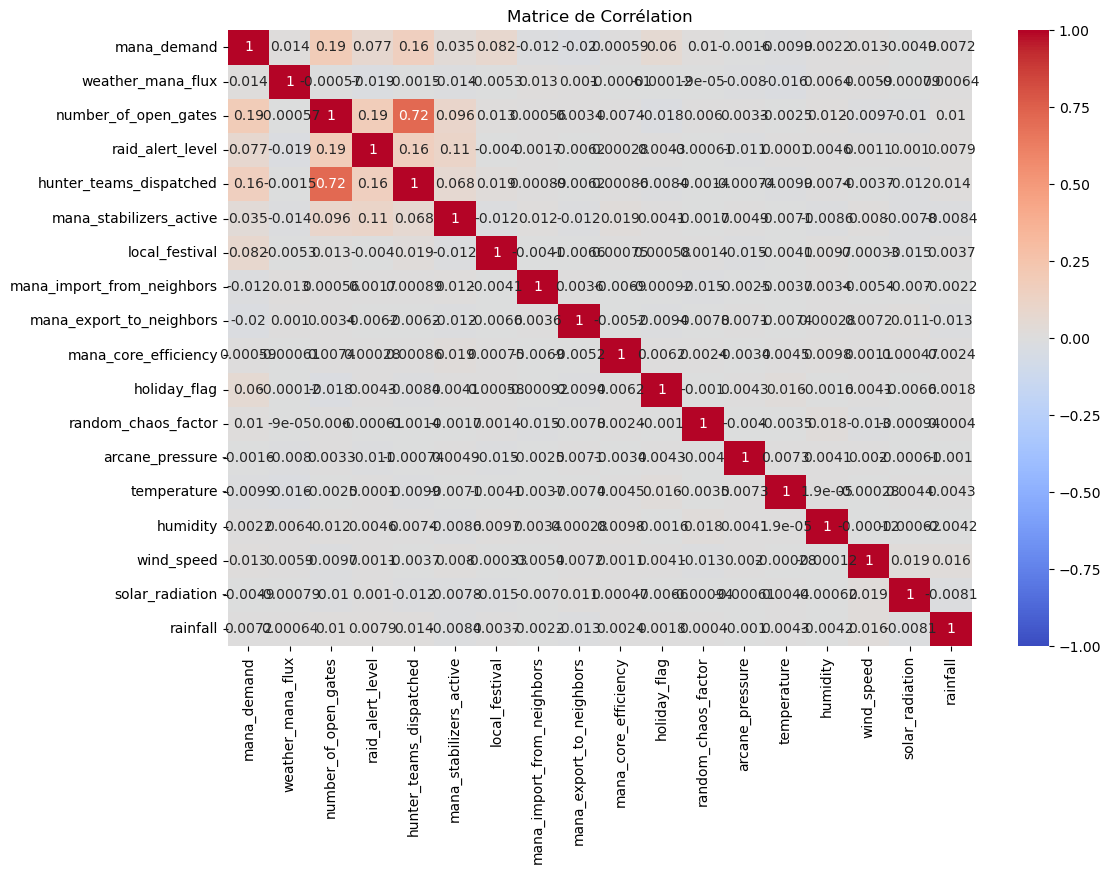

In [33]:

import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données (seulement le fichier d'entraînement pour l'instant)
train_data = pd.read_csv("Data/forcast_train_data.csv")

# Remplacer les valeurs manquantes par 0 (comme dans l'étape 2)
train_data = train_data.fillna(0)

# Visualisation 1 : Relation entre "mana_demand" et "temperature"
plt.figure(figsize=(10, 6))
plt.scatter(train_data["temperature"], train_data["mana_demand"], alpha=0.5)
plt.title("Relation entre Température et Demande de Mana")
plt.xlabel("Température (°C)")
plt.ylabel("Demande de Mana")
plt.grid(True)
plt.show()

# Visualisation 2 : Boîte à moustaches par ville
plt.figure(figsize=(12, 6))
sns.boxplot(x="city", y="mana_demand", data=train_data)
plt.title("Demande de Mana par Ville")
plt.xticks(rotation=45)
plt.show()

# Visualisation 3 : Corrélation entre toutes les variables numériques
plt.figure(figsize=(12, 8))
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matrice de Corrélation")
plt.show()

## V - Entraîner le modèle

In [34]:
import joblib

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Sauvegarder le modèle
joblib.dump(model, "Modele/model_linear_regression.pkl")


['Modele/model_linear_regression.pkl']

## VI- Faire des prédictions

In [35]:

import joblib

# Charger le modèle
model = joblib.load("Modele/model_linear_regression.pkl")

# Charger les données test déjà normalisées
X_test_scaled = pd.read_csv("Data/X_test_processed.csv")

# Prédire
predictions = model.predict(X_test_scaled)

# Charger les données test originales pour ajouter la prédiction
test_data = pd.read_csv("Data/forcast_test_data.csv")
test_data["mana_demand"] = predictions

# Sauvegarder les prédictions
test_data.to_csv("predictions.csv", index=False)

print("Prédictions sauvegardées dans predictions.csv")


Prédictions sauvegardées dans predictions.csv


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## VII- Visualisation les prédictions

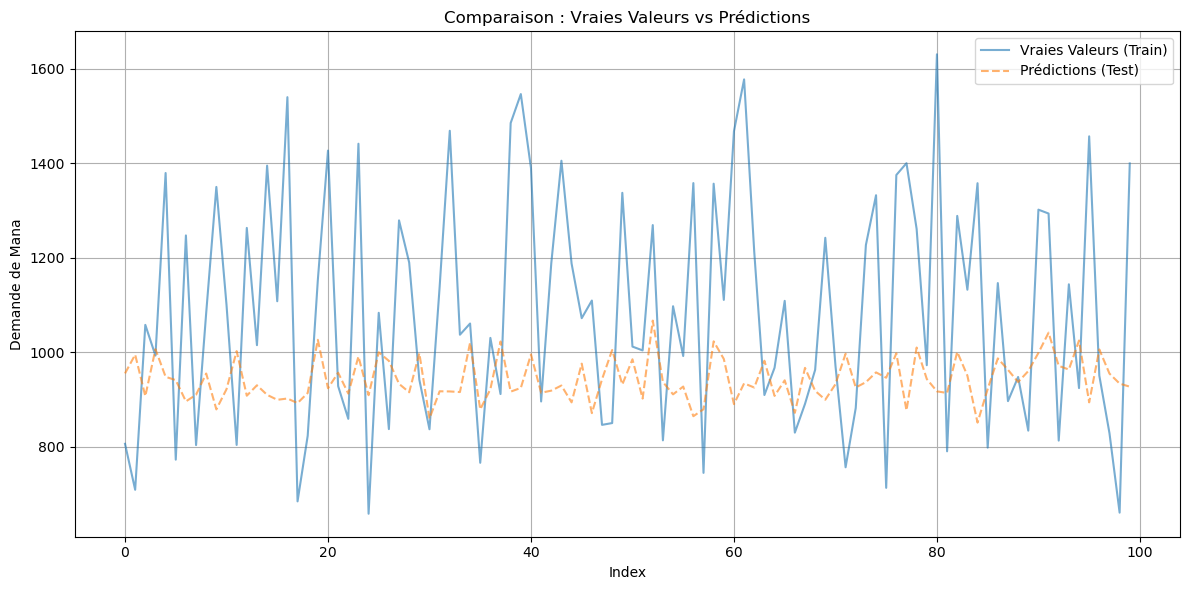

In [36]:
# Visualisation : Comparaison entre vraies valeurs (train) et prédictions (test)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_train.values[:100], label="Vraies Valeurs (Train)", alpha=0.6)
plt.plot(predictions[:100], label="Prédictions (Test)", alpha=0.6, linestyle='--')
plt.title("Comparaison : Vraies Valeurs vs Prédictions")
plt.xlabel("Index")
plt.ylabel("Demande de Mana")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 	VIII- Évaluer le modèle

In [37]:

# Séparer en X et y
X = train_data.drop("mana_demand", axis=1)
y = train_data["mana_demand"]

# Split 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Garder uniquement les colonnes numériques
X_train = X_train.select_dtypes(include=["number"])
X_test = X_test[X_train.columns]  # même colonnes et ordre

# Normaliser
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prédire sur le X_test issu du split
predictions = model.predict(X_test_scaled)

# Calculer le MSE
mse = mean_squared_error(y_test, predictions)
print(" Mean Squared Error :", mse)


 Mean Squared Error : 77095.33889163012
